### Name - Bolonghe B.P.M
### Index No - 190095C
##### Github repository - https://github.com/Pasindu-Manodara/Image-Processing.git

<span style="color:red">Note - I have just included important parts of the code only. Importing libraries and plotting code is only available in the first question. To see full code, visit my github repository</span>.



#### Question1

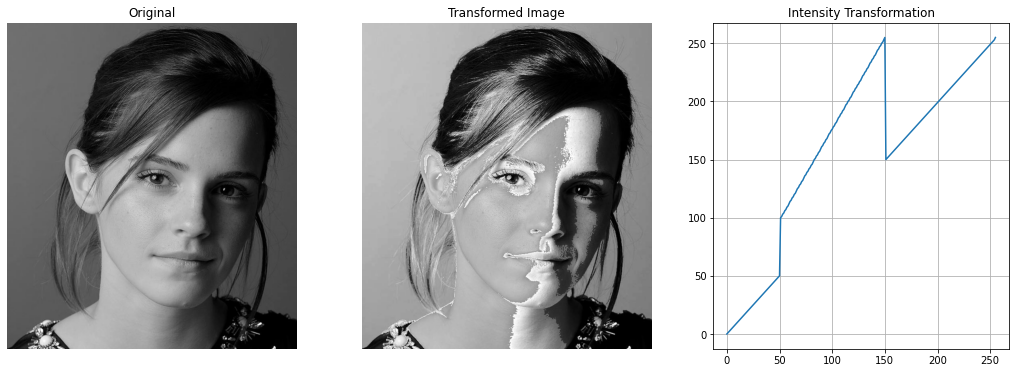

In [1]:
import cv2 as cv  # Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"D:\PasinduManodara\Documents\OneDrive - University of Moratuwa\Academic Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\Assignments\Assignment1\Images\emma_gray.jpg",cv.IMREAD_COLOR)
assert img is not None

t1=np.linspace(0,50,51, endpoint=True)   #making transform function
t2 = np.linspace(50,100,0,endpoint=True)
t3 = np.linspace(100,255,100, endpoint=True)
t4 = np.linspace(255,150,0,endpoint=True)
t5 = np.linspace(150,255,105, endpoint=True)

t = np.concatenate((t1,t2,t3,t4,t5), axis=0).astype(np.uint8)
g= cv.LUT(img,t)

fig,ax = plt.subplots(1,3, figsize=(18,6)) # plotting
ax[0].imshow(img)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(g)
ax[1].axis('off')
ax[1].set_title('Transformed Image')
ax[2].plot(t)
ax[2].set_title('Intensity Transformation')
ax[2].grid()



#### Discussion

After appliying transformation, we can observe that middle pixel intensities have been transformed to more bright( white) values. The reason for that is obvious when we look at intensity transformation plot. It shows that the small and large intensities remain same while middle values have been changed to much larger pixels values. That's why we see more white areas in Emma's image.

#### Question 2
a) White matter

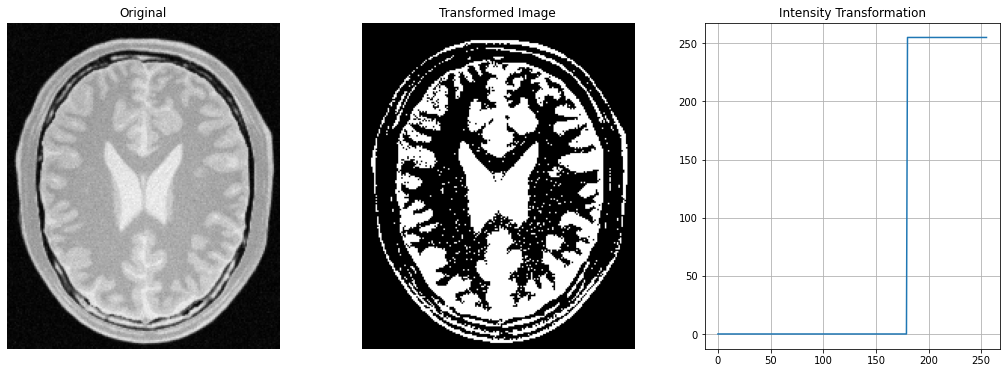

In [2]:

t1 = np.linspace(0,0,180, endpoint=True)
t2=np.linspace(255,255,76, endpoint=True)

t = np.concatenate((t1,t2), axis=0).astype(np.uint8)

plt.show()


#### Discussion
To emphasise white areas more, we have to transform larger pixels intensities close to 255 while smaller pixels values close to zero.

b) Gray matter

Text(0.5, 1.0, 'Intensity Transformation')

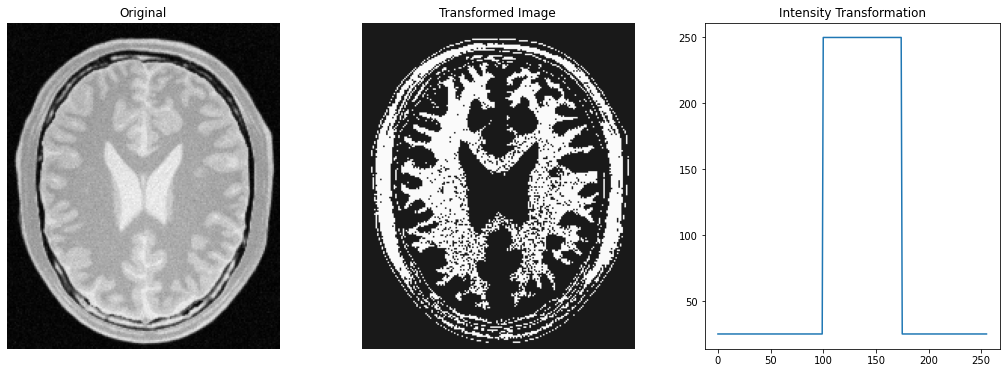

In [3]:

t1 = np.linspace(0,25,0, endpoint=True)
t2=np.linspace(25,25,100, endpoint=True)
t3 = np.linspace(25,250,0,endpoint=True)
t4 = np.linspace(250,250,75, endpoint=True)
t5 = np.linspace(250,25,0,endpoint=True)
t6 = np.linspace(25,25,81, endpoint=True)
t7 = np.linspace(25,0,0, endpoint=True)


t = np.concatenate((t1,t2,t3,t4,t5,t6,t7), axis=0).astype(np.uint8)
g= cv.LUT(img,t)


#### Discussion
To emphasise gray areas as bright , we have to transform middle pixels intensities close to 255 while other pixels values close to zero.

#### Question 3

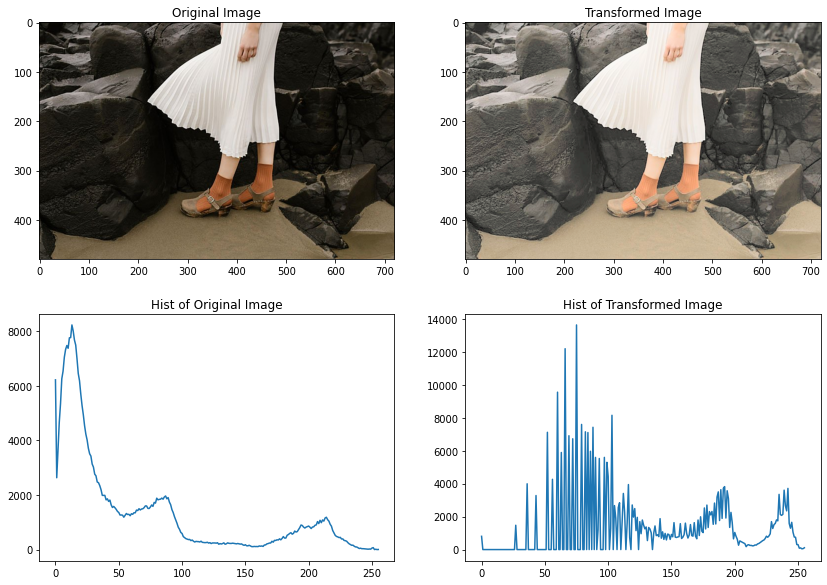

In [4]:
##### Question 3

Lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
(l,a,b) = cv.split(Lab)
gamma = 0.4

transform = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
L = cv.LUT(l, transform)
Lab[:,:,0] = L
Lab[:,:,1] = a
Lab[:,:,2] = b

hist_img = cv.calcHist([img],[0],None,[256],[0,256])  #
hist_Lab = cv.calcHist([Lab],[0],None,[256],[0,256])




#### Discussion
After applying gamma correction, the overoll brightness has been increased. We can observe this behavior when we compare histogram of two images.

#### Question 4

Text(0.5, 1.0, 'Histogram of the Equalized image')

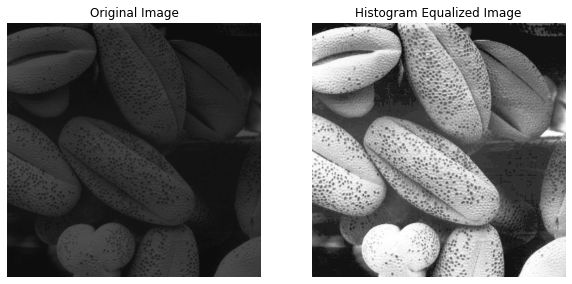

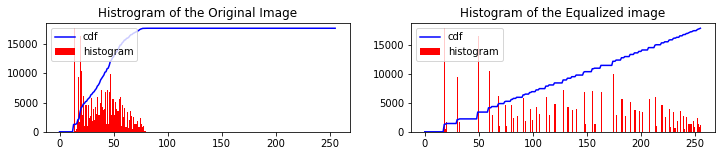

In [14]:

img = cv.imread(path,cv.IMREAD_GRAYSCALE)

equ = np.zeros((256,),dtype=np.float16)

height,width=img.shape
hist,bins = np.histogram(img.ravel(),256,[0,256])
cdf= hist.cumsum()
cdf_normalized=cdf*hist.max()/cdf.max()

for i in range(256): # histogram equalizing
    for j in range(i+1):
        equ[i]+=hist[j]/(height*width)
    equ[i]=round(equ[i]*255)
equ = equ.astype(np.uint8)

img2 = img.copy()
for i in range(width):
    for j in range(height):
        g = img2[j,i] 
        
        img2[j,i]=equ[g]

hist_e,bins_e= np.histogram(img2.ravel(),256,[0,256])
cdf_e= hist_e.cumsum()
cdf_normalized_e=cdf_e*hist_e.max()/cdf_e.max()



#### Discussion
The intensities in the original image are very law. That is why it is dark. After equalizing, the intensities distribute all over the region by increasing the overall intensity of the image. As a result, we get monotonocally increasing CDF

#### Question 5

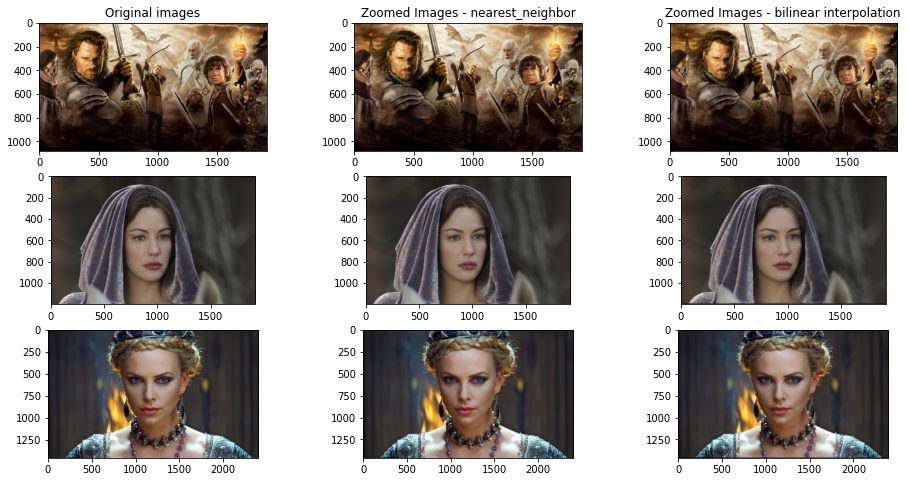

In [7]:

def zoom(method,img, scale):
    if method =='nearest_neighbor':
        rows = scale*img.shape[0]
        cols = scale*img.shape[1]
        zoomed = np.zeros((rows,cols,3),dtype=img.dtype)
        for i in range(rows):
            for j in range(cols):
                n_i = round(i/scale)
                n_j = round(j/scale)

                if n_i>=img.shape[0]:
                    n_i=img.shape[0]-1
            
                if n_j>=img.shape[1]:
                    n_j=img.shape[1]-1
        
                zoomed[i,j]=img[n_i,n_j]
        return zoomed

    elif method == 'bilinear interpolation':
        rows = scale*img.shape[0]
        cols = scale*img.shape[1]
        zoomed = np.zeros((rows,cols,3),dtype=img.dtype)

        for i in range(rows):
            for j in range(cols):
                n_i = int(i/scale)
                n_j = int(j/scale)
                if n_i+1<= img.shape[0]-1 and n_j+1<= img.shape[1]-1:
                    zoomed[i,j]= (abs(n_i-i/scale)*img[n_i+1,n_j]+abs(n_i+1-i/scale)*img[n_i,n_j])*abs(n_j+1-j/scale) + (abs(n_i-i/scale)*img[n_i+1,n_j+1]+abs(n_i+1-i/scale)*img[n_i,n_j+1])*abs(n_j-j/scale)
                    #bilinear interpolation function
                if n_i+1<= img.shape[0]-1 and n_j+1>= img.shape[1]-1:
                    zoomed[i,j]= (abs(n_i-i/scale)*img[n_i+1,n_j]+abs(n_i+1-i/scale)*img[n_i,n_j])*abs(n_j-j/scale) + (abs(n_i-i/scale)*img[n_i+1,n_j]+abs(n_i+1-i/scale)*img[n_i,n_j])*abs(n_j-j/scale)

                if n_i+1>= img.shape[0]-1 and n_j+1<= img.shape[1]-1:
                    zoomed[i,j]= (abs(n_i-i/scale)*img[n_i,n_j]+abs(n_i-i/scale)*img[n_i,n_j])*abs(n_j-j/scale) + (abs(n_i-i/scale)*img[n_i,n_j+1]+abs(n_i-i/scale)*img[n_i,n_j+1])*abs(n_j-j/scale)

                if n_i+1>= img.shape[0]-1 and n_j+1>= img.shape[1]-1:
                    zoomed[i,j]= (abs(n_i-i/scale)*img[n_i,n_j]+abs(n_i-i/scale)*img[n_i,n_j])*abs(n_j-j/scale) + (abs(n_i-i/scale)*img[n_i,n_j]+abs(n_i-i/scale)*img[n_i,n_j])*abs(n_j-j/scale)
        return zoomed


#### Discussion
The small images are zoomed by 4 times. We can see zoomed images are in same size as original images. We can conclude that also by looking at below ssd values.

In [8]:
def ssd(A,B):
  dif = A.ravel().astype(int) - B.ravel().astype(int)
  return np.dot( dif, dif )/len(dif)

print('ssd value of img2 nearest neighbor method', ssd(img2_O,zoom('nearest_neighbor',img2_s,4)))
print('ssd value of img2 bilinear interpolation method',ssd(img2_O,zoom('bilinear interpolation',img2_s,4)))


ssd value of img2 nearest neighbor method 64.62937832754629
ssd value of img2 bilinear interpolation method 101.95257060185185


#### Question 6

([], [])

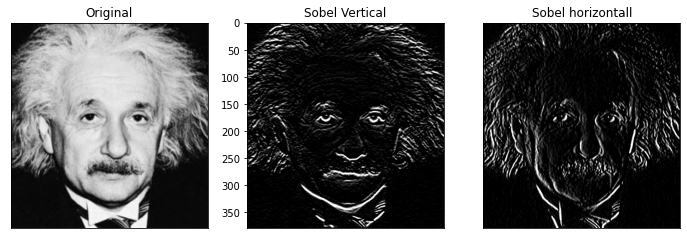

In [9]:
### Question 6
def sobel(type,img):
    if type=='vertical':
        kernel = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype='float')
        img_v = cv.filter2D(img,-1,kernel)
        return img_v

    elif type == 'horizontal':
        kernel = np.array([(-1,-0,1),(-2,0,2),(-1,0,1)], dtype='float')  
        img_v = cv.filter2D(img,-1,kernel)
        return img_v

    else:
        print("Invalid type")
        

([], [])

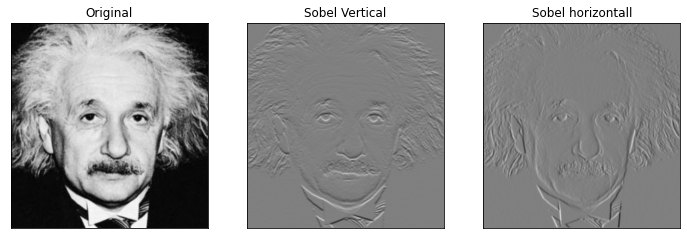

In [10]:

def sobel(type,img):
    if type == 'vertical':
        kernel = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype='float')   
        rows, cols = img.shape

        img_v = np.zeros((rows,cols),dtype=float)
        for i in range(1,rows-1):
            for j in range(1,cols-1):
                # neighbour pixel array
                img_array=np.array([(img[i-1,j-1],img[i-1,j],img[i-1,j+1]), (img[i,j-1],img[i,j],img[i,j+1]), (img[i+1,j-1],img[i+1,j],img[i+1,j+1])])
                img_v[i,j] = np.sum(np.multiply(img_array,kernel))
        return img_v
    elif type=='horizontal':
 
        kernel = np.array([(-1,-0,1),(-2,0,2),(-1,0,1)], dtype='float')  
        rows, cols = img.shape
        img_v = np.zeros((rows,cols),dtype=float) 
        for i in range(1,rows-1):
            for j in range(1,cols-1):
                # neighbour pixel array
                img_array=np.array([(img[i-1,j-1],img[i-1,j],img[i-1,j+1]), (img[i,j-1],img[i,j],img[i,j+1]), (img[i+1,j-1],img[i+1,j],img[i+1,j+1])])
                img_v[i,j] = np.sum(np.multiply(img_array,kernel))

        return img_v  
    else:
        print("Invalid type")   


#### Discussion
In my own code what I'm done is creating 3 x 3 array having the elements as the neighbour pixel intensities around perticular pixel. Then it is multiplyed by the sobel kernel and take the sum.

(-0.5, 363.5, 379.5, -0.5)

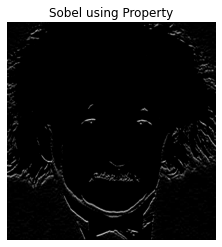

In [11]:

kernel1=np.array([[1],[2],[1]])
img_v = cv.filter2D(img,-1,kernel1)
kernel2 = np.array([1,0,-1])
img_vv = cv.filter2D(img_v,-1,kernel2)
fig,ax = plt.subplots(1,1,figsize=(6,4))
ax.imshow(img_vv,cmap='gray')
ax.set_title('Sobel using Property')
ax.axis('off')

#### Discussion
In here first I applied "kerenel1" into image and applied the "kernel2" to the output image of previous step and got the final outpul image.

#### Question 7

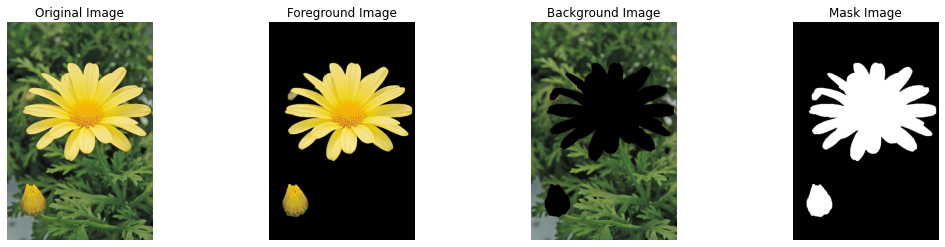

In [12]:
### Question 7

img_c=img.copy()

mask = np.zeros(img_c.shape[:2],np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)
rect = (50,50,500,800)
cv.grabCut(img_c,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img_c = img_c*mask2[:,:,np.newaxis]
bgdModel= cv.subtract(img,img_c)



(-0.5, 560.5, 840.5, -0.5)

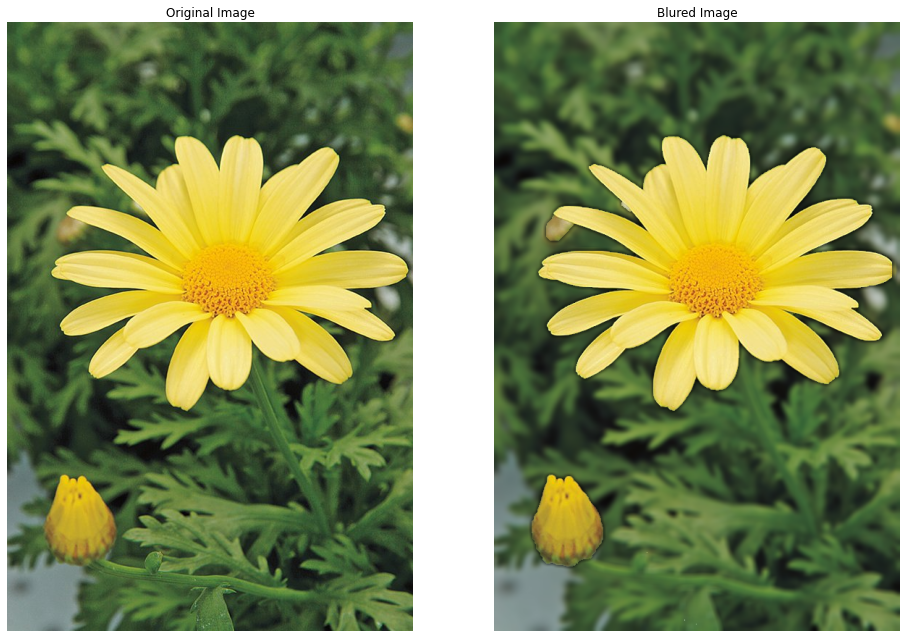

In [2]:
sigma = 6
blur = cv.GaussianBlur(bgdModel,(9,9),sigma)
outline = blur*mask2[:,:,np.newaxis] # get the outline of the edges
bg_blur = np.subtract(blur,outline) # substract the outline from blur image
img_enh = np.add(bg_blur,img_c)



#### Discussion 
By just appling Grabcut we can segment the image. In the 2nd part I have blurred the image using GaussianBlur.If you look at the pedicel, we can see that it has blured. The reason for having black color outline around foreground is that we get intensities near to zero at the edges due to GaussianBlur kernel. When we concatinate blured background and foreground that black color outline exists.